In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

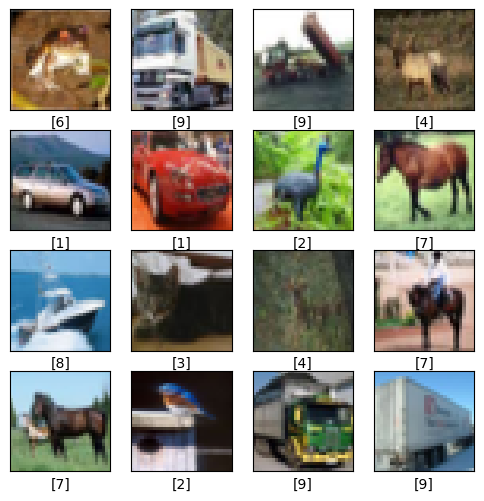

In [3]:
plt.figure(figsize=(6, 6))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [4]:
x_train = x_train / np.max(x_train)
x_test = x_test / np.max(x_test)

y_train_cat = keras.utils.to_categorical(y_train, 10) 
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [9]:
def double_conv(input, f1, f2):
    x = keras.layers.Conv2D(f1, 3, padding='same', activation='relu')(input)
    x = keras.layers.Conv2D(f2, 3, padding='same', activation='relu')(x)
    return x

In [15]:
inputs = keras.Input(shape=(32, 32, 3), name='img')

x = double_conv(inputs, 32, 64)
block_1_output = keras.layers.MaxPooling2D(3)(x)

x = double_conv(block_1_output, 64, 64)
block_2_output = keras.layers.add([x, block_1_output])

x = double_conv(block_2_output, 64, 64)
block_3_output = keras.layers.add([x, block_2_output])

x = keras.layers.Conv2D(64, 3, padding='same', activation='relu')(block_3_output)
x = keras.layers.GlobalAveragePooling2D()(x)

x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)

outputs = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs)

In [16]:
model.compile(optimizer='adam',
              metrics=['accuracy'],
              loss='categorical_crossentropy')

In [17]:
model.fit(x_train, y_train_cat, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 90s 69ms/step - accuracy: 0.2355 - loss: 1.9510 - val_accuracy: 0.4412 - val_loss: 1.5266
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 107s 85ms/step - accuracy: 0.5061 - loss: 1.3394 - val_accuracy: 0.6061 - val_loss: 1.0705
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 105s 84ms/step - accuracy: 0.6088 - loss: 1.0895 - val_accuracy: 0.6594 - val_loss: 0.9539
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 103s 82ms/step - accuracy: 0.6678 - loss: 0.9338 - val_accuracy: 0.6881 - val_loss: 0.8763
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 102s 82ms/step - accuracy: 0.7056 - loss: 0.8299 - val_accuracy: 0.7185 - val_loss: 0.7851
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 104s 83ms/step - accuracy: 0.7334 - loss: 0.7509 - val_accuracy: 0.7262 - val_loss: 0.8018
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 103s 82ms/step - accuracy: 0.7573 - loss: 0.6880 - val_accuracy: 0.7460 - val_loss: 0.7279
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 104s 83ms/step - accuracy: 0

In [18]:
scores = model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7606 - loss: 0.7244


In [20]:
out = model.predict(x_test, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step


In [39]:
categories = {
    0: 'самолёт',
    1: 'машина',
    2: 'птица',
    3: 'кошка',
    4: 'олень',
    5: 'собака',
    6: 'лягушка',
    7: 'лошадь',
    8: 'корабль',
    9: 'грузовик',
}

Мнение нейросети:  кошка
Верный ответ:  кошка


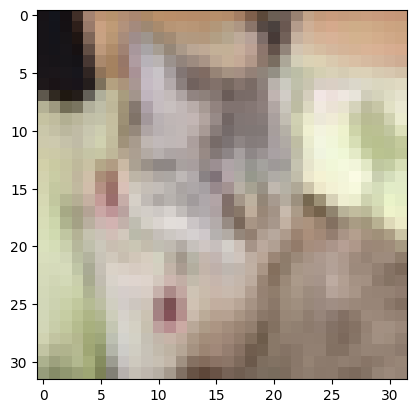

In [40]:
i = 8
plt.imshow(x_test[i], cmap='gray')

print('Мнение нейросети: ', categories[np.argmax(out[i])])
print('Верный ответ: ', categories[y_test[i][0]])


In [38]:
model.fit(x_train, y_train_cat, epochs=2, validation_split=0.2)

Epoch 1/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 109s 87ms/step - accuracy: 0.8513 - loss: 0.4222 - val_accuracy: 0.7684 - val_loss: 0.7222
Epoch 2/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 109s 87ms/step - accuracy: 0.8598 - loss: 0.3959 - val_accuracy: 0.7630 - val_loss: 0.7523


Мнение нейросети:  птица
Верный ответ:  лягушка


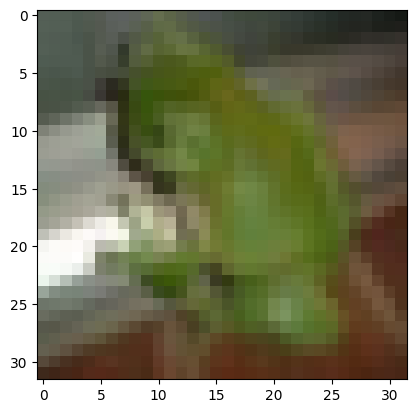

In [50]:
i = 7
plt.imshow(x_test[i], cmap='gray')

print('Мнение нейросети: ', categories[np.argmax(out[i])])
print('Верный ответ: ', categories[y_test[i][0]])